In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.linalg import inv
import time
from scipy.sparse.linalg import cg

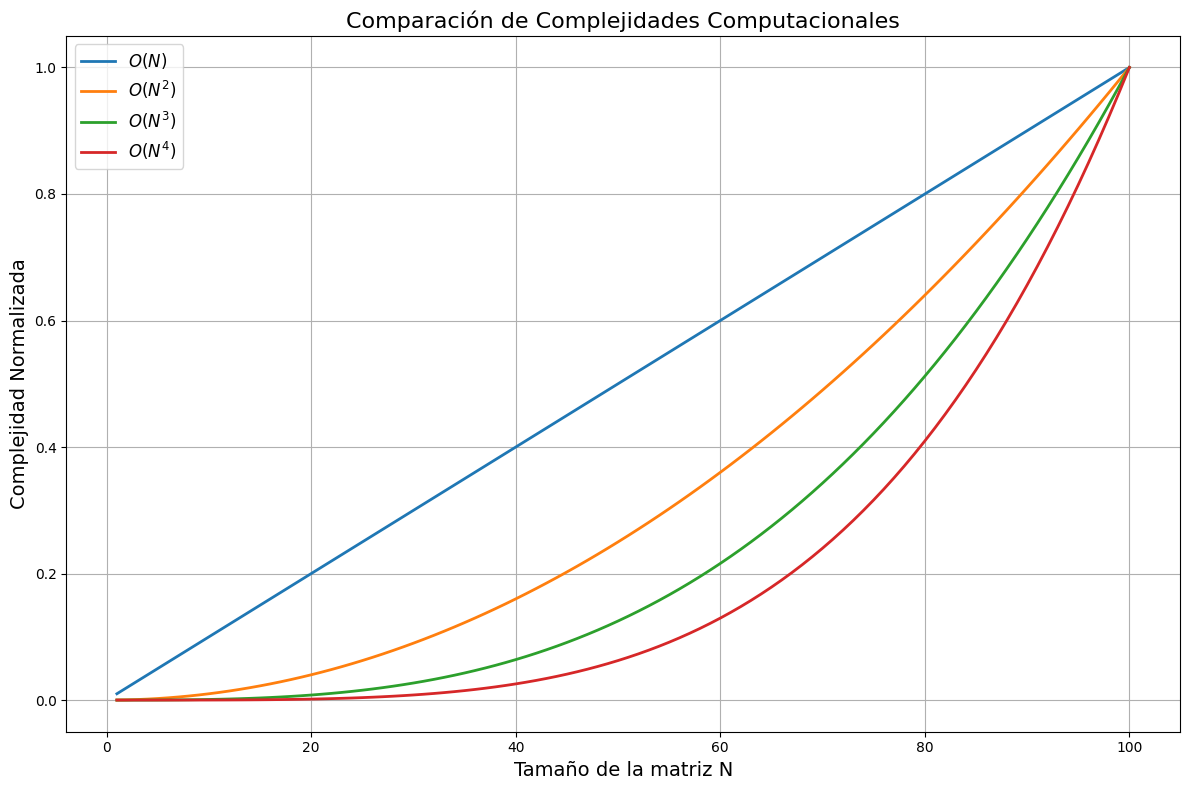

In [18]:

def plot_complejidades(N_max=100, step=1):
    """
    Plotea las curvas de complejidad O(N), O(N^2), O(N^3) y O(N^4) en función de N.
    
    Parámetros:
    - N_max: Tamaño máximo de N.
    - step: Incremento de N.
    """
    N = np.arange(1, N_max + 1, step)
    
    # Definir las funciones de complejidad
    O_N = N
    O_N2 = N**2
    O_N3 = N**3
    O_N4 = N**4
    
    # Normalizar las funciones para una mejor visualización
    # Escalamos cada curva dividiendo por su máximo valor
    O_N_norm = O_N / O_N.max()
    O_N2_norm = O_N2 / O_N2.max()
    O_N3_norm = O_N3 / O_N3.max()
    O_N4_norm = O_N4 / O_N4.max()
    
    plt.figure(figsize=(12, 8))
    
    # Ploteo de las curvas normalizadas
    plt.plot(N, O_N_norm, label='$O(N)$', linewidth=2)
    plt.plot(N, O_N2_norm, label='$O(N^2)$', linewidth=2)
    plt.plot(N, O_N3_norm, label='$O(N^3)$', linewidth=2)
    plt.plot(N, O_N4_norm, label='$O(N^4)$', linewidth=2)
    
    plt.xlabel('Tamaño de la matriz N', fontsize=14)
    plt.ylabel('Complejidad Normalizada', fontsize=14)
    plt.title('Comparación de Complejidades Computacionales', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


N_max = 100  # Tamaño máximo de N
step = 1     # Incremento de N
plot_complejidades(N_max, step)



Medición de tiempos de cómputo...
N=1: Inversión Directa=0.000078s, Iterativo=0.000383s
N=11: Inversión Directa=0.000068s, Iterativo=0.000402s
N=21: Inversión Directa=0.000192s, Iterativo=0.000904s
N=31: Inversión Directa=0.000096s, Iterativo=0.000858s
N=41: Inversión Directa=0.000125s, Iterativo=0.001415s
N=51: Inversión Directa=0.000277s, Iterativo=0.003677s
N=61: Inversión Directa=0.000341s, Iterativo=0.003061s
N=71: Inversión Directa=0.000397s, Iterativo=0.007658s
N=81: Inversión Directa=0.000489s, Iterativo=0.010010s
N=91: Inversión Directa=0.002466s, Iterativo=0.011751s
N=101: Inversión Directa=0.000533s, Iterativo=0.008892s
N=111: Inversión Directa=0.000588s, Iterativo=0.009687s
N=121: Inversión Directa=0.000661s, Iterativo=0.013563s
N=131: Inversión Directa=0.001063s, Iterativo=0.012866s
N=141: Inversión Directa=0.000945s, Iterativo=0.013180s
N=151: Inversión Directa=0.000973s, Iterativo=0.009745s
N=161: Inversión Directa=0.001131s, Iterativo=0.011329s
N=171: Inversión Directa=

/var/folders/26/2j5v5y394q7fg0m_5hxsv0w80000gp/T/ipykernel_33627/724434504.py:23: DeprecationWarning: 'scipy.sparse.linalg.cg' keyword argument `tol` is deprecated in favor of `rtol` and will be removed in SciPy v1.14.0. Until then, if set, it will override `rtol`.
  x, info = cg(H_herm, y_new, tol=tol, maxiter=max_iter)


N=201: Inversión Directa=0.002008s, Iterativo=0.019765s
N=211: Inversión Directa=0.002136s, Iterativo=0.015935s
N=221: Inversión Directa=0.002205s, Iterativo=0.017514s
N=231: Inversión Directa=0.002618s, Iterativo=0.017249s
N=241: Inversión Directa=0.002916s, Iterativo=0.020696s
N=251: Inversión Directa=0.003157s, Iterativo=0.020952s
N=261: Inversión Directa=0.002941s, Iterativo=0.021192s
N=271: Inversión Directa=0.003495s, Iterativo=0.023272s
N=281: Inversión Directa=0.003757s, Iterativo=0.032504s
N=291: Inversión Directa=0.004033s, Iterativo=0.028370s
N=301: Inversión Directa=0.004379s, Iterativo=0.031709s
N=311: Inversión Directa=0.004626s, Iterativo=0.029407s
N=321: Inversión Directa=0.004398s, Iterativo=0.029905s
N=331: Inversión Directa=0.005503s, Iterativo=0.045651s
N=341: Inversión Directa=0.005837s, Iterativo=0.037804s
N=351: Inversión Directa=0.006471s, Iterativo=0.038657s
N=361: Inversión Directa=0.006578s, Iterativo=0.042199s
N=371: Inversión Directa=0.006947s, Iterativo=0.

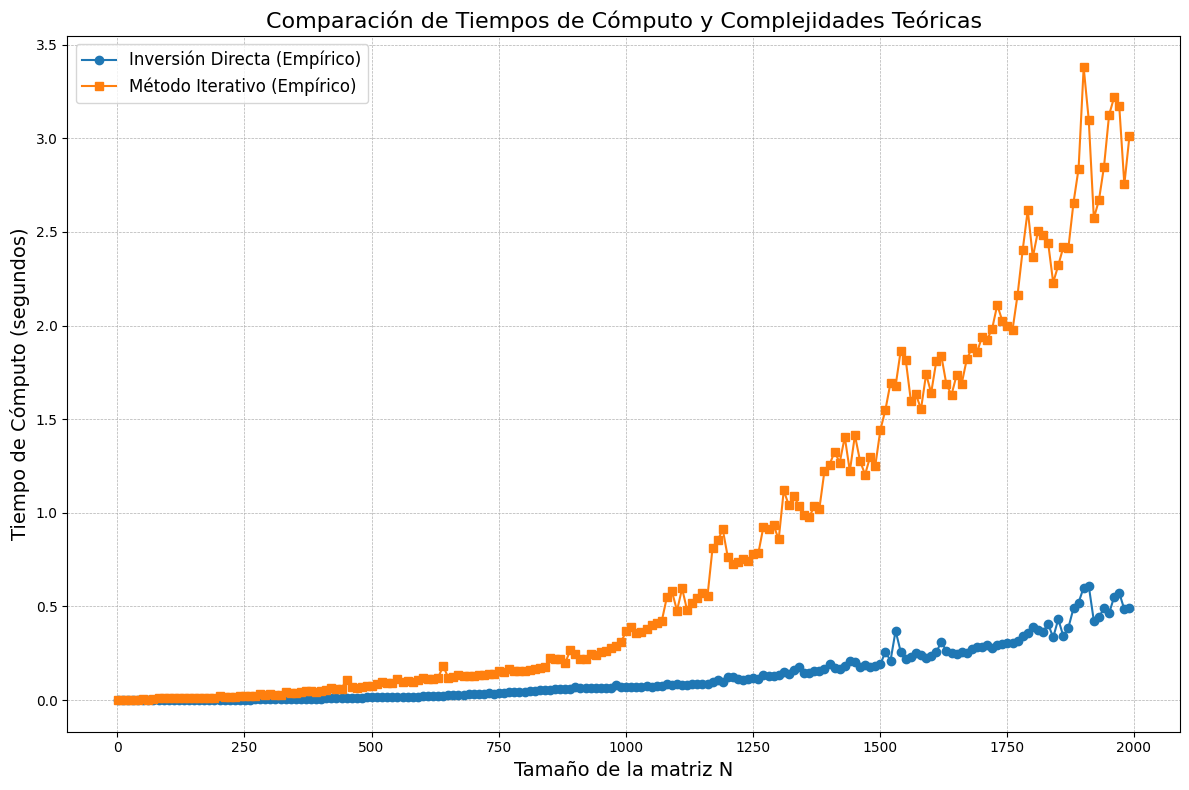

In [22]:

def generar_matriz_H(N):
    """
    Genera una matriz de canal H de tamaño N x N con valores aleatorios complejos.
    """
    real = np.random.randn(N, N)
    imag = np.random.randn(N, N)
    H = real + 1j * imag
    return H

def invertir_matriz(H):
    """
    Calcula la inversa de la matriz H utilizando la función inv de NumPy.
    """
    return inv(H)

def resolver_sistema_iterativo(H, y, tol=1e-6, max_iter=1000):
    """
    Resuelve el sistema Hx = y utilizando el método de Gradiente Conjugado.
    """
    # Convertir H a una matriz Hermitiana positiva definida si es posible
    H_herm = np.dot(H.conj().T, H)
    y_new = np.dot(H.conj().T, y)
    x, info = cg(H_herm, y_new, tol=tol, maxiter=max_iter)
    return x

def medir_tiempos(N_max, step=10):
    """
    Mide los tiempos de inversión directa y método iterativo para tamaños de matriz desde 10 hasta N_max.
    """
    N_values = range(1, N_max + 1, step)
    tiempos_inversion = []
    tiempos_iterativo = []

    for N in N_values:
        H = generar_matriz_H(N)
        y = np.random.randn(N) + 1j * np.random.randn(N)
        
        # Medir tiempo de inversión directa
        start_time = time.time()
        try:
            H_inv = invertir_matriz(H)
            tiempo_inversion = time.time() - start_time
        except np.linalg.LinAlgError:
            # En caso de que H no sea invertible
            tiempo_inversion = np.nan
        tiempos_inversion.append(tiempo_inversion)
        
        # Medir tiempo del método iterativo
        start_time = time.time()
        try:
            x_iterativo = resolver_sistema_iterativo(H, y)
            tiempo_iterativo = time.time() - start_time
        except Exception as e:
            # En caso de que el método iterativo falle
            tiempo_iterativo = np.nan
        tiempos_iterativo.append(tiempo_iterativo)
        
        print(f"N={N}: Inversión Directa={tiempo_inversion:.6f}s, Iterativo={tiempo_iterativo:.6f}s")
    
    return N_values, tiempos_inversion, tiempos_iterativo

def plot_tiempos_con_complejidades(N_values, tiempos_inversion, tiempos_iterativo):
    """
    Plotea los tiempos de inversión directa y método iterativo en función de N junto con las curvas teóricas O(N), O(N^2), O(N^3) y O(N^4).
    """
    plt.figure(figsize=(12, 8))
    
    # Convertir N_values a array para operaciones vectoriales
    N = np.array(N_values)
    
    # Eliminar valores NaN
    mask = ~np.isnan(tiempos_inversion) & ~np.isnan(tiempos_iterativo)
    N = N[mask]
    tiempos_inversion = np.array(tiempos_inversion)[mask]
    tiempos_iterativo = np.array(tiempos_iterativo)[mask]
    
    # Ajustar las curvas teóricas a los datos empíricos
    # Encontrar constantes de escala basadas en los primeros puntos de datos
    coef_O_N = tiempos_iterativo[0] / N[0]
    coef_O_N2 = tiempos_inversion[0] / (N[0]**3)
    coef_O_N3 = tiempos_inversion[0] / (N[0]**3)  # O(N^3)
    coef_O_N4 = coef_O_N3 / (N[0])  # O(N^4)

    # Definir las curvas teóricas
    O_N = coef_O_N * N
    O_N2 = coef_O_N2 * N**2
    O_N3 = coef_O_N3 * N**3
    O_N4 = coef_O_N4 * N**4

    # Ploteo de tiempos empíricos
    plt.plot(N, tiempos_inversion, label='Inversión Directa (Empírico)', marker='o')
    plt.plot(N, tiempos_iterativo, label='Método Iterativo (Empírico)', marker='s')


    plt.xlabel('Tamaño de la matriz N', fontsize=14)
    plt.ylabel('Tiempo de Cómputo (segundos)', fontsize=14)
    plt.title('Comparación de Tiempos de Cómputo y Complejidades Teóricas', fontsize=16)
    plt.legend(fontsize=12)
    plt.yscale('linear')  # Escala lineal
    plt.xscale('linear')
    plt.grid(True, which="both", ls="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


N_max = 2000  
step = 10    # Incremento en N

print("Medición de tiempos de cómputo...")
N_values, tiempos_inversion, tiempos_iterativo = medir_tiempos(N_max, step)

print("Generando gráficos...")
plot_tiempos_con_complejidades(N_values, tiempos_inversion, tiempos_iterativo)


